In [4]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn


[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
import csv

In [6]:
path1 = f"./data/round_2/prices_round_2_day_-1.csv"
path2 = f"./data/round_2/prices_round_2_day_0.csv"
path3 = f"./data/round_2/prices_round_2_day_1.csv"
results_path = f"./data/round_2/algo_results.csv"

In [7]:
data1 = pd.read_csv(path1, delimiter=";", parse_dates=True)
data2 = pd.read_csv(path2, delimiter=";", parse_dates=True)
data3 = pd.read_csv(path3, delimiter=";", parse_dates=True)
results_data = pd.read_csv(results_path, delimiter=";", parse_dates=True)

# Exploratory Data Analysis

## Criteria:
### - Whenever **sunlight** exposure < 7 hours a day, production of orchids will decrease 4% every 10 minutes
### - Ideal **humidity** for orchids is between 60% and 80%. When outside this range, production falls 2% every 5% change in humidity
### - Orchids that cannot be **stored** correctly will deteriorate, and good **storage** comes for 0.1 seashells per orchid per timestamp

<Axes: >

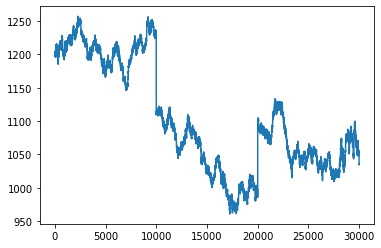

In [8]:
data = pd.concat([data1, data2, data3], ignore_index=True)
data["ORCHIDS"].plot()

In [9]:
orchid_results_data = results_data[results_data["product"] == "ORCHIDS"]
orchid_results_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,1,200,ORCHIDS,1094,16,1093.0,11.0,1092.0,3.0,1101,6,1102.0,19.0,1103.0,2.0,1097.5,0.0
5,1,300,ORCHIDS,1093,10,1092.0,4.0,1085.0,52.0,1101,10,1102.0,4.0,1109.0,52.0,1097.0,0.0
7,1,400,ORCHIDS,1093,10,1092.0,3.0,1086.0,51.0,1101,10,1102.0,3.0,1109.0,51.0,1097.0,0.0
10,1,500,ORCHIDS,1094,5,1093.0,4.0,1086.0,41.0,1102,5,1103.0,4.0,1109.0,41.0,1098.0,0.0
13,1,600,ORCHIDS,1093,10,1092.0,3.0,1086.0,49.0,1101,10,1102.0,3.0,1109.0,49.0,1097.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,1,99500,ORCHIDS,1067,5,1066.0,4.0,1060.0,43.0,1074,5,1075.0,4.0,1082.0,43.0,1070.5,0.0
2982,1,99600,ORCHIDS,1068,7,1067.0,2.0,1061.0,46.0,1075,7,1076.0,2.0,1083.0,46.0,1071.5,0.0
2985,1,99700,ORCHIDS,1068,5,1067.0,3.0,1061.0,48.0,1076,5,1077.0,3.0,1083.0,48.0,1072.0,0.0
2990,1,99800,ORCHIDS,1068,8,1067.0,3.0,1061.0,49.0,1075,8,1076.0,3.0,1083.0,49.0,1071.5,0.0


In [10]:
combined_orchid_data = pd.merge(data3, orchid_results_data.drop(columns=["day", "product", "profit_and_loss"]), on=["timestamp"])
combined_orchid_data # has no NaN values in any column

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,bid_price_1,bid_volume_1,...,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price
0,200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1,1094,16,...,11.0,1092.0,3.0,1101,6,1102.0,19.0,1103.0,2.0,1097.5
1,300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1,1093,10,...,4.0,1085.0,52.0,1101,10,1102.0,4.0,1109.0,52.0,1097.0
2,400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1,1093,10,...,3.0,1086.0,51.0,1101,10,1102.0,3.0,1109.0,51.0,1097.0
3,500,1097.75,0.9,9.5,-5.0,2098.7756,70.113200,1,1094,5,...,4.0,1086.0,41.0,1102,5,1103.0,4.0,1109.0,41.0,1098.0
4,600,1097.25,0.9,9.5,-5.0,2098.5280,70.135720,1,1093,10,...,3.0,1086.0,49.0,1101,10,1102.0,3.0,1109.0,49.0,1097.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,99500,1070.75,1.1,8.5,-5.5,1701.2242,84.906700,1,1067,5,...,4.0,1060.0,43.0,1074,5,1075.0,4.0,1082.0,43.0,1070.5
994,99600,1071.75,1.1,8.5,-5.5,1700.9775,84.925300,1,1068,7,...,2.0,1061.0,46.0,1075,7,1076.0,2.0,1083.0,46.0,1071.5
995,99700,1072.00,1.1,8.5,-5.5,1700.7317,84.943930,1,1068,5,...,3.0,1061.0,48.0,1076,5,1077.0,3.0,1083.0,48.0,1072.0
996,99800,1071.75,1.1,8.5,-5.5,1700.4869,84.962590,1,1068,8,...,3.0,1061.0,49.0,1075,8,1076.0,3.0,1083.0,49.0,1071.5


<Axes: >

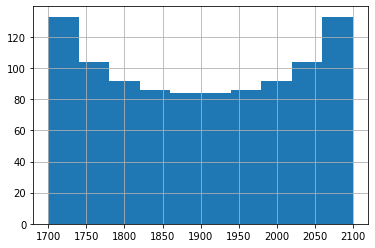

In [11]:
combined_orchid_data["SUNLIGHT"].hist()

<Axes: >

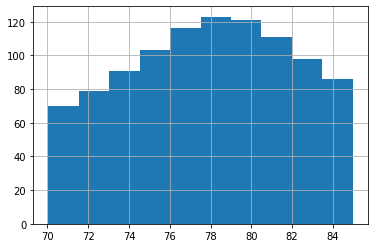

In [12]:
combined_orchid_data["HUMIDITY"].hist()

<Axes: >

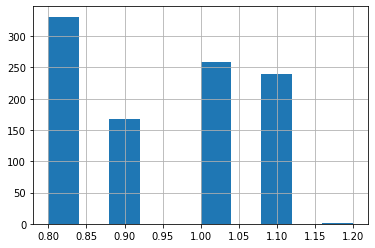

In [13]:
combined_orchid_data["TRANSPORT_FEES"].hist()

<Axes: >

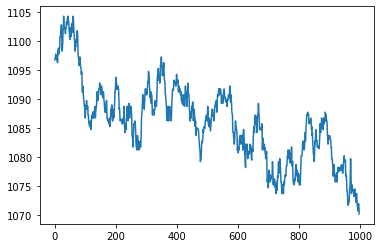

In [14]:
combined_orchid_data["ORCHIDS"].plot()

<Axes: >

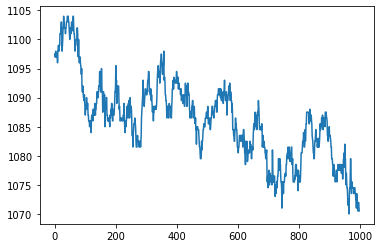

In [15]:
combined_orchid_data["mid_price"].plot()

In [16]:
parsed_data = combined_orchid_data[["SUNLIGHT", "HUMIDITY", "ORCHIDS", "mid_price"]]
parsed_data

,SUNLIGHT,HUMIDITY,ORCHIDS,mid_price
0,2099.5132,70.045395,1096.75,1097.5
1,2099.2683,70.068030,1097.00,1097.0
2,2099.0225,70.090640,1097.25,1097.0
3,2098.7756,70.113200,1097.75,1098.0
4,2098.5280,70.135720,1097.25,1097.0
...,...,...,...,...
993,1701.2242,84.906700,1070.75,1070.5
994,1700.9775,84.925300,1071.75,1071.5
995,1700.7317,84.943930,1072.00,1072.0
996,1700.4869,84.962590,1071.75,1071.5


In [17]:
def add_lags(parsed_data):
    lags = 3
    for i in range(1, lags + 1):
        parsed_data[f'lag{i}'] = parsed_data['mid_price'].shift(i)

    parsed_data.dropna(inplace=True)
    return parsed_data

In [89]:
# parsed_data = add_lags(parsed_data)
# parsed_data
poly = np.polynomial.Polynomial.fit(combined_orchid_data["timestamp"], combined_orchid_data["ORCHIDS"], 50)
# print(poly.coef[1])
# poly2 = np.polynomial.Polynomial(np.polyder([poly.coef[i] for i in range(50, -1, -1)], 1))
poly2 = poly.deriv()
# poly = np.polynomial.Polynomial(vals)

print(poly2)

# plt.scatter(combined_orchid_data.index.values, combined_orchid_data["ORCHIDS"])
# plt.plot(combined_orchid_data.index.values, poly(combined_orchid_data.index.values))
# plt.show()

0.0012453680027556897 + 0.028608851482663386·x¹ - 0.3782837645695045·x² -
2.4001931551060154·x³ + 22.068715225408752·x⁴ + 43.48768730113987·x⁵ -
676.0662917074702·x⁶ + 266.9884897095659·x⁷ + 13081.319599812792·x⁸ -
16252.574468178771·x⁹ - 166308.25365194152·x¹⁰ + 212797.58530362332·x¹¹ +
1411061.674003413·x¹² - 1468337.7369835747·x¹³ - 8087682.708772315·x¹⁴ +
6147716.359306082·x¹⁵ + 31385897.992306247·x¹⁶ - 16026388.196022417·x¹⁷ -
80747316.95630789·x¹⁸ + 24339002.640835658·x¹⁹ + 127163664.54897046·x²⁰ -
14546530.959863856·x²¹ - 86960198.53319947·x²² - 13171478.054131385·x²³ -
62388636.798928104·x²⁴ + 21767572.465233453·x²⁵ + 142092530.12997523·x²⁶ +
7798044.357561528·x²⁷ + 12244355.407465197·x²⁸ - 23009129.157161154·x²⁹ -
166904684.9404356·x³⁰ - 9172669.18440994·x³¹ + 7009831.8286196105·x³² +
22524664.331014547·x³³ + 193658692.4400533·x³⁴ + 13867267.703846201·x³⁵ -
15271705.413889581·x³⁶ - 20957720.77048094·x³⁷ - 229965008.0386·x³⁸ -
18490398.13336648·x³⁹ + 60008923.17978121·x⁴⁰ + 216

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


In [95]:
y_vals = np.array([poly(x) for x in combined_orchid_data["timestamp"]])
rate_of_change = np.array([poly2(x) for x in combined_orchid_data["timestamp"]])



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


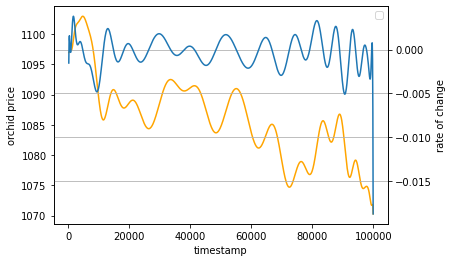

In [101]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel('timestamp')
ax1.set_ylabel('orchid price')
ax2.set_ylabel('rate of change')
ax2.grid()
ax1.legend()

ax1.plot(combined_orchid_data["timestamp"], y_vals, color="orange")
ax2.plot(combined_orchid_data["timestamp"], rate_of_change)

# plt.plot(combined_orchid_data["timestamp"], combined_orchid_data["ORCHIDS"])

In [106]:
x = combined_orchid_data[["SUNLIGHT", "HUMIDITY"]]
x

KeyError: 'SUNLIGHT, HUMIDITY'

In [15]:
# y = parsed_data["mid_price"]
# y

In [16]:
# model = LinearRegression()
# model.fit(x, y)
# pred = model.predict(x)
# parsed_data["pred"] = pred
# parsed_data

In [17]:
# print("Coefficients:", model.coef_)
# print("Intercept:", model.intercept_)
# print("Accuracy:", model.score(x, y))